# Testes com QRCode

In [1]:
import cv2; print "OpenCV", cv2.__version__
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

OpenCV 3.2.0-dev


In [2]:
#ini-iPython
def imshow(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

## Lendo imagem da câmera

In [ ]:
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

## Lendo QRCode do arquivo

In [3]:
frame = cv2.imread('/home/vinicius/Dropbox/Projeto Mestrado/Codigos/Vision/iPython/Testes/qrcode.png')

## Exibindo imagem

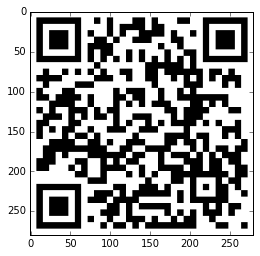

In [4]:
imshow(frame)
#end-iPython

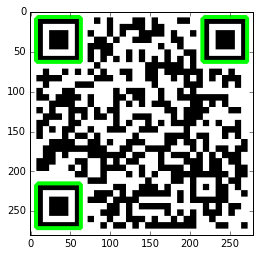

[array([[[  9, 215]],

       [[  7, 217]],

       [[  7, 270]],

       [[  8, 271]],

       [[ 63, 271]],

       [[ 63, 216]],

       [[ 62, 215]]], dtype=int32), array([[[217,   7]],

       [[215,   9]],

       [[215,  62]],

       [[216,  63]],

       [[271,  63]],

       [[271,   8]],

       [[270,   7]]], dtype=int32), array([[[ 9,  7]],

       [[ 7,  9]],

       [[ 7, 62]],

       [[ 8, 63]],

       [[63, 63]],

       [[63,  8]],

       [[62,  7]]], dtype=int32)]


In [57]:
img = frame.copy() #debug-iPython
def qrDetector(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,150,300,apertureSize = 3)
    im2, contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    if len(contours):
        hierarchy = hierarchy[0]
    for i in range(len(contours)):
        k = i
        c = 0
        while hierarchy[k][2] != -1:
            k = hierarchy[k][2]
            c = c + 1
        if hierarchy[k][2] != -1:
            c = c + 1
        if c >= 5:
            yield contours[i]

#ini-iPython
contours = qrDetector(img)
marks = []
for c in contours:
    marks.append(c)

img = frame.copy()
for points in marks:
    img = cv2.drawContours(img, [points], 0, (0,255,0), 3)
imshow(img)

print marks
#end-iPython

[[35, 243], [243, 35], [35, 35]]


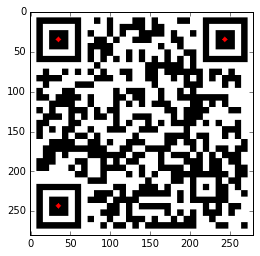

In [8]:
def calculateCenter(marks):
    centers = []

    for points in marks:
        M = cv2.moments(points)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        centers.append([cX, cY])

    return centers

#ini-iPython
img = frame.copy()

print calculateCenter(marks)

for x,y in centers:
    img = cv2.circle(img,(x,y), 1,(0,0,255),3)

imshow(img)
#end-iPython

In [60]:
#des-iPython def position(centers):
#ini-tab
dist = -np.inf

for x in range(len(centers)):
    for y in range(x+1, len(centers)):
        if np.linalg.norm(np.array(centers[x])-np.array(centers[y])) > dist:
            dist = np.linalg.norm(np.array(centers[x])-np.array(centers[y]))
            points1 = x
            points3 = y
            
print 'Valores:', points1, points3, dist #debug-iPython

center = np.mean(
    np.array([
        centers[points1],
        centers[points3],
    ]),
    axis = 0
)

for x in range(len(centers)):
    if x != points1 and x != points3:
        points2 = x

if centers[points2][0] <= center[0] and centers[points2][1] <= center[1]:
    print "Normal" #debug-iPython
    if centers[points1][0] <= center[0] and centers[points1][1] <= center[1]:
        #edes-iPython return [points1, points2, points3]
        print [points1, points2, points3]
    else:
        #edes-iPython return [points3, points2, points1]
        print [points3, points2, points1]
elif centers[points2][0] <= center[0] and centers[points2][1] > center[1]:
    print "Cabeca pra baixo" #debug-iPython
elif centers[points2][0] > center[0] and centers[points2][1] > center[1]:
    print "Cabeça pra baixo e invertido" #debug-iPython
elif centers[points2][0] > center[0] and centers[points2][1] <= center[1]:
    print "Invertido" #debug-iPython
#end-tab

0 1
0 2
1 2
Valores: 0 1 294.156420974
Normal
[1, 2, 0]


In [61]:
position = [1,2,0]


---- Main Code ----

Acessando a camera
doxygen-iPython

In [ ]:
video_capture = cv2.VideoCapture(0)

Main loop

In [ ]:
#des-iPython while True:
#ini-tab
ret, frame = video_capture.read()

#edes-iPython cv2.imshow('Video', frame) #Displaying original video
imshow(frame)

contours = qrDetector(frame)

marks = []
for c in contours:
    marks.append(c)

for points in marks:
    frame = cv2.drawContours(frame, [points], 0, (0,255,0), 3)

#edes-iPython cv2.imshow('Fiducial points', frame) #Displaying fiducial points
imshow(frame)

#des-iPython if cv2.waitKey(1) & 0xFF == ord('q'):
#des-iPython     break
#end-tab

Finishing processes

In [ ]:
video_capture.release()
cv2.destroyAllWindows()